In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Machine Learning Classification Algoritmaları



**Sınıflandırma kavramı, basitçe bir veri kümesi (data set) üzerinde tanımlı olan çeşitli sınıflar arasında veriyi dağıtmaktır. Sınıflandırma algoritmaları, verilen eğitim kümesinden bu dağılım şeklini öğrenirler ve daha sonra sınıfının belirli olmadığı test verileri geldiğinde doğru şekilde sınıflandırmaya çalışırlar.

Veri kümesi üzerinde verilen bu sınıfları belirten değerlere etiket (label) ismi verilir ve gerek eğitim gerekse test sırasında verinin sınıfının belirlenmesi için kullanılırlar.

**Biz bu notebook üzerinde etiketli veriler ile çalışacağız.
****

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")


## Datasetimiz üstünde çeşitli manüplasyonlar yapacağız datamızı anlamaya çalışacağız.
## Çeşitli görselleştirmeler yapacağız
## Makine öğrenmesi algoritmalarını tek tek deneyereceğiz
## Datasetimiz üzerinde en başarılı olan algoritmayı görmüş olacağız

In [ ]:
df.info

In [ ]:
df.head()

In [ ]:
df.columns 


##age:age in years
##sex:(1 = male; 0 = female)
##cp:chest pain type
##trestbps:resting blood pressure (in mm Hg on admission to the hospital)
##chol:serum cholestoral in mg/dl
##fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
##restecg:resting electrocardiographic results
##thalach:maximum heart rate achieved
##exang:exercise induced angina (1 = yes; 0 = no)
##oldpeak:ST depression induced by exercise relative to rest
##slope:the slope of the peak exercise ST segment
##ca:number of major vessels (0-3) colored by flourosopy
##thal:3 = normal; 6 = fixed defect; 7 = reversable defect
##target:1 or 0





In [ ]:
df.rename(columns={"cp":"chest_pain","trestbps":"blood_pressure","chol":"serum_cholestoral","fbs":"blood_sugar","restecg":"electrocardiographic_results","thalach":"heart_rate","exang":"exercise"},inplace=True)

## Daha anlaşılır olması açısından column isimlerimizi değiştirdik.

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

##Kayıp verimiz bulunmuyor.Eğer kayıp verimiz bulunsaydı bu durumu çeşitli teknikler kullanarak manüple etmemiz gerekirdi.

In [ ]:
df.shape #14 adet özelliğimiz var

In [ ]:
df.describe() 

In [ ]:
#Columnların birbiriyle korelasyonu
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='Reds',annot=True,fmt='.2f') 
plt.show()

In [ ]:
# targetların kaçar hastada olduğunu bulabiliriz. Target columnu bizim labellarımız.
plt.figure(figsize = (10,6))
target = df['target']
target_values = target.value_counts()
plt.bar(target_values.index, target_values)
plt.xlabel("Target Types")
plt.ylabel("Count")
plt.title("Counts Of Target Types")
plt.show()

#Dengeli bir dağılım var. Eğer datasetimizde labellarımız dengesiz bir dağılım gösterseydi. Öğrenme doğru gerçekleşemezdi.

In [ ]:
def plot_hist(variable):
    
    
    var = df[variable]
    
    #Bütün featurelarımız için histogram grafikleri
    
    plt.figure(figsize = (10,3))
    plt.hist(var,bins=75)
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title("{} Distrubiton with Histogram".format(variable))
    plt.show()

In [ ]:
features=['age', 'sex', 'chest_pain', 'blood_pressure', 'serum_cholestoral',
       'blood_sugar', 'electrocardiographic_results', 'heart_rate', 'exercise',
       'oldpeak', 'slope', 'ca', 'thal', 'target']
for i in features:
    plot_hist(i)

In [ ]:
## Some Relations 

In [ ]:
df[["age","target"]].groupby(["target"]).mean().sort_values(by="age",ascending=False)

In [ ]:
df[["sex","target"]].groupby(["target"]).mean().sort_values(by = 'sex', ascending = False)

In [ ]:
df[["chest_pain","target"]].groupby(["target"]).mean().sort_values(by = 'chest_pain', ascending = False)

In [ ]:
df[["blood_pressure","target"]].groupby(["target"]).mean().sort_values(by = 'blood_pressure', ascending = False)

In [ ]:
df[["serum_cholestoral","target"]].groupby(["target"]).mean().sort_values(by = 'serum_cholestoral', ascending = False)

In [ ]:
df[["blood_sugar","target"]].groupby(["target"]).mean().sort_values(by = 'blood_sugar', ascending = False)

# Supervised Learning

Supervised learning algoritmalarını kullanacağız. Temel olarak elimizdeki etiketli veriyi train ve test verilerine ayıracağız. Train verilerinde gerçekleştirdiğimiz eğitimi Test verileri üzerinde deneyerek başarıları test edeceğiz. 
****

# 1)Logistic Regression Classification


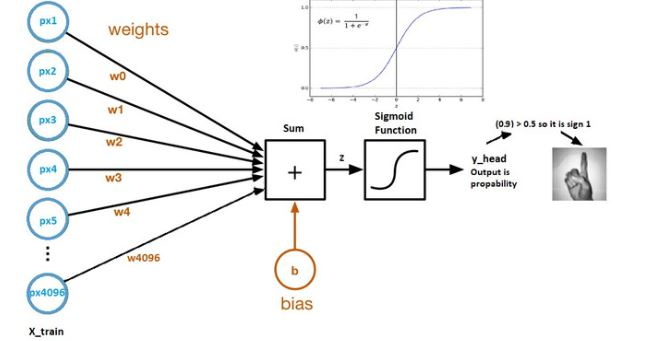





**Logistic Regression Classification, deep learning algoritmalarının da temelidir diyebiliriz. Biz Logistic regression classification ı elimizde iki farklı sınıfı olan datalar üzerinde kullanabiliriz. Etiket olarak 1,0 veya kedi,köpek olan datalar örnek gösterilebilir. Yukarıdaki compute graphın da gösterdiği gibi logistic regressionun arkasında temel bir matematik yatmaktadır.

**Temel amaç weight ve bias değerlerini forward ve backward propagationlar ile sürekli güncelleyerek eğitmektir**


**Forward Propagation:
**
**** Z=(w.T).x_train+b****
**** y_head=sigmoid(z)****
**Loss function ve cost function hesaplanır**

**Backward Propagation:**

**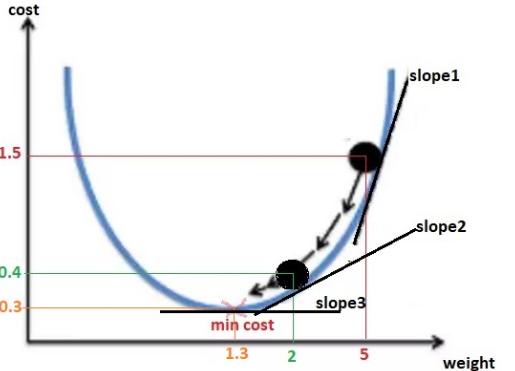**





In [ ]:
y=df["target"].values
x=df.drop(columns=["target"],axis=1)

**Normalizasyon işlemi sayısal değer olarak büyük featureların diğer featureları ezmemesi için yapılmalıdır. Aksi halde sayısal değeri yüksek olan özellikler modelde diğerleri üzerinde üstünlük kurabilir.**

In [ ]:
x=(x-np.min(x))/(np.max(x)-np.min(x)).values

In [ ]:
x.head()

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=101)

In [ ]:
x_train

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

predict=log_reg.predict(x_test)


**Logistic Regression Classification algoritmasıyla yaklaşık olarak %86lık bir başarı elde edebildik.**

In [ ]:
log_reg.score(x_test,y_test)



# K-Nearest Neighbour(KNN) Classification

**1)K değerini seç
  2)K en yakın data noktalarını bul
  3)K en yakın komşu arasında hangi labeldan kaç tane var hesapla
  4)Test ettiğimiz point ya da data hangi değere ait tespit et
  **
  
****


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predict_2=knn.predict(x_test)

**n_neighbors=3 değeri için yaklaşık olarak yüzde 82 lik bir başarı yakaladık. Peki farklı n değerleri için daha yüksek başarı alabilir miyiz? **

In [ ]:
knn.score(x_test,y_test)

In [ ]:
aralık=np.arange(1,25)
train_doğruluk=[]
test_doğruluk=[]

for i,k in enumerate(aralık):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    predict_2=knn.predict(x_test)
    train_doğruluk.append(knn.score(x_train,y_train))
    test_doğruluk.append(knn.score(x_test,y_test))
    
# Şimdi doğruluk grafiğini çizdireceğiz

plt.figure(figsize=[13,8])
plt.plot(aralık, test_doğruluk, label = 'Test Doğruluğu')
plt.plot(aralık, train_doğruluk, label = 'Training Doğruluğu')
plt.legend()
plt.title('-value VS Doğruluk')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(aralık)
plt.savefig('graph.png')
plt.show()
print("En iyi doğruluk {} with K = {}".format(np.max(test_doğruluk),1+test_doğruluk.index(np.max(test_doğruluk))))


# Support Vector Machines(SVM) Classification

**Sınıflandırma (Classification) konusunda kullanılan oldukça etkili ve basit yöntemlerden birisidir. Sınıflandırma için bir düzlemde bulunan iki grup arasında bir sınır çizilerek iki grubu ayırmak mümkündür. Bu sınırın çizileceği yer ise iki grubun da üyelerine en uzak olan yer olmalıdır. İşte SVM bu sınırın nasıl çizileceğini belirler.**


**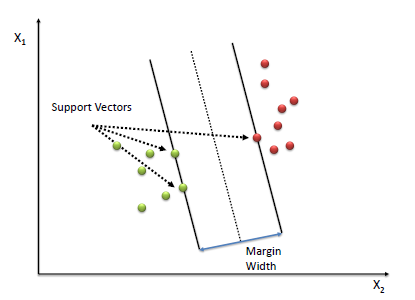**

In [ ]:
from sklearn.svm import SVC

svc=SVC(random_state=101)
svc.fit(x_train,y_train)

predict_3=svc.predict(x_test)


In [ ]:
svc.score(x_test,y_test)

**Support Vector Machine algoritmasını kullanarak eğittiğimiz modelimizin başarısı yaklaşık olarak %82 oldu.**

# Random Forest Classification

**Train ve Test dataları olarak datasetimizi zaten bölmüştük. Test datamızı bir kenara koyalım ve train datamız üzerinden konuşalım. Öncelikle train datamızın üstünden N tane sample seçelim ve bunlara subsample ismini verelim. Sonrasında seçtiğimiz bu subsample'ı decision tree ler ile train edelim ve tekrar başa dönelim,bir döngü halinde eğitimimizi gerçekleştirelim. İşte sezgisel olarak bu modele random forest diyeceğiz.**

**Aşağıda decision treelerin basitçe görselleştirilmiş hali bulunmakta**

**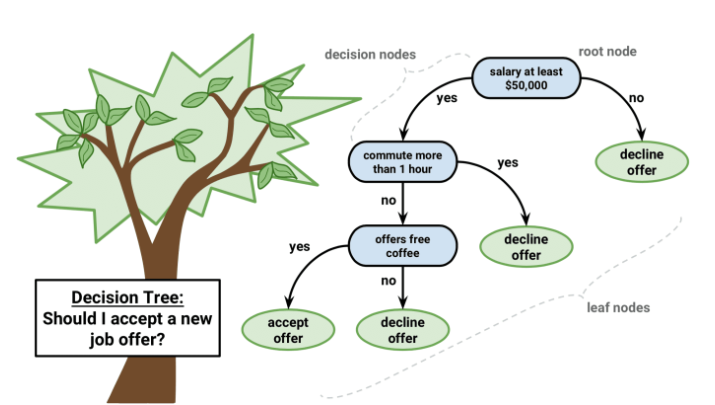**


**Aşağıda Random Forest Algoritmasının basitçe görselleştirilmiş hali bulunmakta**


**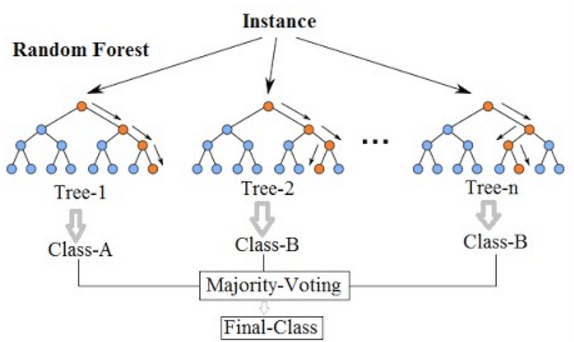**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train,y_train)
predict_4=random_forest.predict(x_test)


In [ ]:
random_forest.score(x_test,y_test)

In [ ]:
ara=np.arange(1,30)
train_doğruluk_2=[]
test_doğruluk_2=[]

for i,k in enumerate(ara):
    random_forest=RandomForestClassifier(n_estimators=k)
    random_forest.fit(x_train,y_train)
    predict=random_forest.predict(x_test)
    
    test_doğruluk_2.append(random_forest.score(x_test,y_test))
    train_doğruluk_2.append(random_forest.score(x_train,y_train))
    
# Şimdi doğruluk grafiğini çizdireceğiz

plt.figure(figsize=[13,8])
plt.plot(ara, test_doğruluk_2, label = 'Test Doğruluğu')
plt.plot(ara, train_doğruluk_2, label = 'Training Doğruluğu')
plt.legend()
plt.title('-value VS Doğruluk')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(ara)
plt.show()

In [ ]:
test_doğruluk_2

In [ ]:
max(test_doğruluk_2)

##random forest algoritması için n_estimators=19 olduğunda başarımız %91 civarı oldu

# Decision Tree Classification

**Decision Tree'nin amacı veri özelliklerinden basit kurallar çıkarıp bu kuralları öğrenerek bir değişkenin değerini tahmin eden modeli oluşturmaktır.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

predict_5=decision_tree.predict(x_test)

In [ ]:
decision_tree.score(x_test,y_test)

**Classification modellerinin karşılaştırılması

****KNN modeli : 0.869566****
****SVM modeli : 0.826086****
****Decision Tree modeli : 0.84782****
****Random Forest modeli : 0.91304****
****Logistic Regression modeli : 0.86956****
****Datasetimiz için en uygun model Random Forest oldu.

 ****Teşekkürler ****